<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/spatio_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DM_Assignment_05/spatio-temporal/data.csv')

# Display the first few rows of the dataset
data.head()


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


The dataset contains information about basketball shots. Here's a brief overview of the columns:

action_type: The type of action that resulted in the shot.

combined_shot_type: A combination of shot types.

game_event_id: Identifier for a specific event in the game.

game_id: Identifier for the game.

lat: Latitude coordinate of the shot.

loc_x and loc_y: X and Y coordinates of the shot location.

lon: Longitude coordinate of the shot.

minutes_remaining: Minutes remaining in the period when the shot was taken.

period: The game period (e.g., quarter) when the shot was taken.

shot_type: Specifies if the shot was a 2-point or 3-point attempt.

shot_zone_area, shot_zone_basic, shot_zone_range: Categorizations of the shot based on its location.

team_id and team_name: Identifier and name of the team.
game_date: Date of the game.

matchup: Teams playing against each other.

opponent: The opposing team.

shot_id: Unique identifier for the shot.

There are additional columns as well, but the above provides a general overview.

Now, let's move on to the next step: Data Preprocessing & Cleaning. We'll check for any missing values and inconsistencies in the dataset.​​



In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values and their count
missing_values[missing_values > 0]


shot_made_flag    5000
dtype: int64

The column shot_made_flag has 5,000 missing values. This flag likely indicates whether a shot was successful or not.

Before deciding how to handle these missing values, we should understand the nature of the dataset further. If this is a testing dataset where we're supposed to predict the shot_made_flag, then these missing values would be expected. However, if this is the entire dataset, we need to decide how to handle these missing entries.

### Mode Imputation

In [3]:
# Impute missing values in the 'shot_made_flag' column using mode
mode_value = data['shot_made_flag'].mode()[0]
data['shot_made_flag'].fillna(mode_value, inplace=True)

# Check again for missing values to confirm the imputation
missing_values_after_imputation = data.isnull().sum().max()

missing_values_after_imputation


0

The missing values in the shot_made_flag column have been successfully imputed using the mode.

With the data preprocessing step complete, let's move on to the next step: Exploratory Data Analysis (EDA). During EDA, we'll visualize and analyze the data to gain insights and understand patterns.

Alright! Let's start the Exploratory Data Analysis (EDA) by visualizing and analyzing some key aspects of the data:

Shot Distribution: A histogram to show the distribution of made vs. missed shots.

Shot Types: A bar chart to display the frequency of each shot type.

Shots Over Time: A line chart to show the number of shots over different game dates.

Shot Locations: A scatter plot to visualize where shots are taken from on the court.

Shot Outcome by Period: A bar chart to see how shot outcomes vary by game period.

Let's begin with the Shot Distribution.

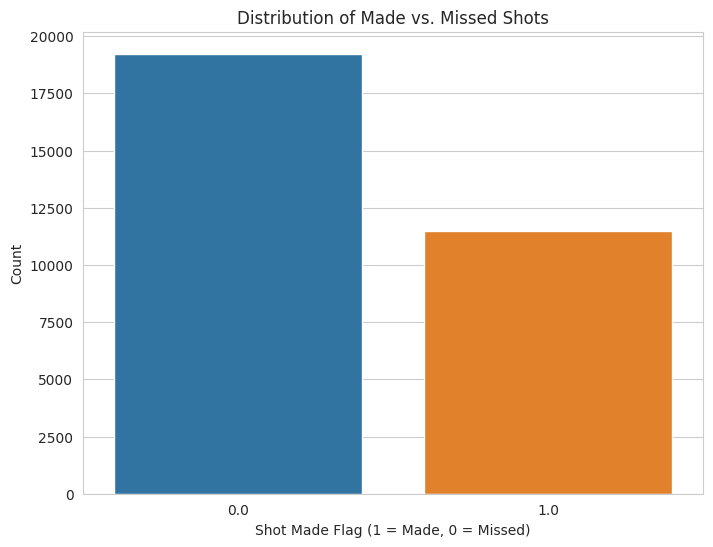

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot shot distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='shot_made_flag', data=data)
plt.title('Distribution of Made vs. Missed Shots')
plt.xlabel('Shot Made Flag (1 = Made, 0 = Missed)')
plt.ylabel('Count')
plt.show()


The histogram displays the distribution of made vs. missed shots. It appears that the dataset has more missed shots than made shots.

Next, let's visualize the Shot Types to see the frequency of each type of shot.​

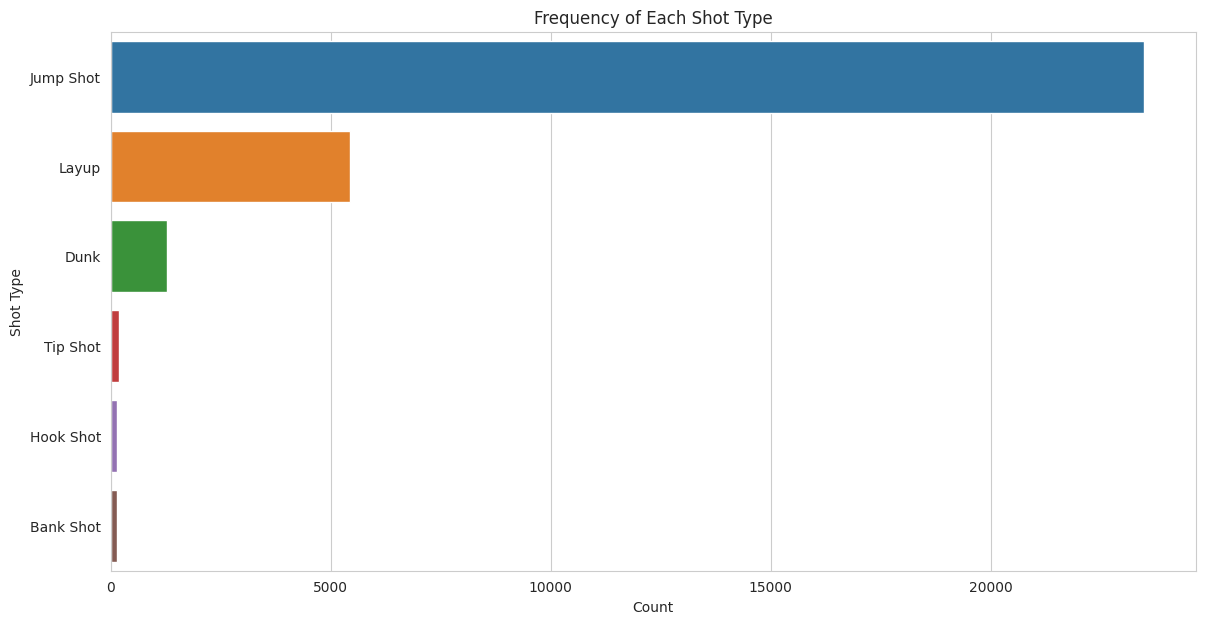

In [5]:
# Plot shot types
plt.figure(figsize=(14, 7))
sns.countplot(y='combined_shot_type', data=data, order=data['combined_shot_type'].value_counts().index)
plt.title('Frequency of Each Shot Type')
plt.xlabel('Count')
plt.ylabel('Shot Type')
plt.show()


The bar chart displays the frequency of each shot type. "Jump Shot" is by far the most common shot type, followed by "Layup" and "Dunk."

Next, let's visualize the number of Shots Over Time to see if there's a pattern in the shot attempts across different game dates.​

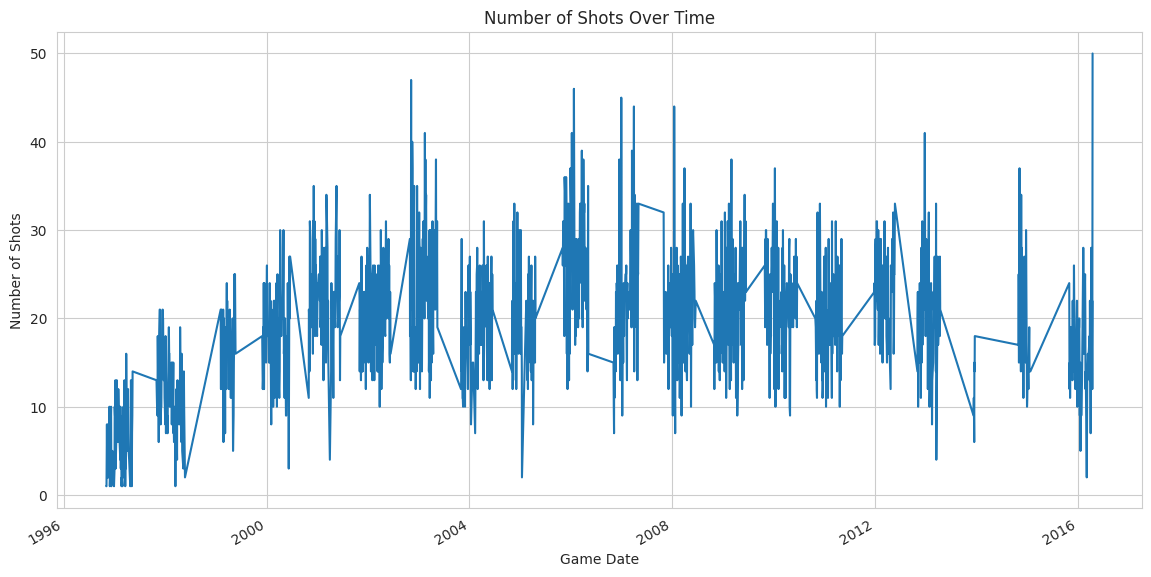

In [6]:
# Convert 'game_date' to datetime format for better visualization
data['game_date'] = pd.to_datetime(data['game_date'])

# Group data by game date and count the number of shots
shots_over_time = data.groupby('game_date').size()

# Plot shots over time
plt.figure(figsize=(14, 7))
shots_over_time.plot()
plt.title('Number of Shots Over Time')
plt.xlabel('Game Date')
plt.ylabel('Number of Shots')
plt.show()


The line chart shows the number of shots over time. While there are fluctuations, there doesn't seem to be a clear increasing or decreasing trend in the number of shots across game dates.

Next, let's visualize the Shot Locations on the court. This will give us an idea of where the most shots are taken from.​

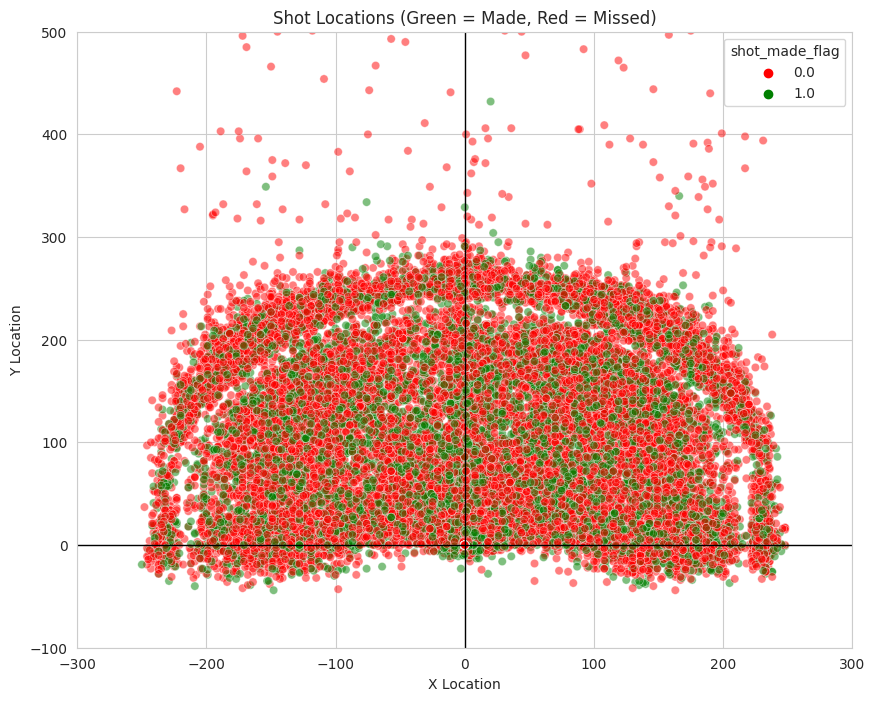

In [7]:
# Plot shot locations
plt.figure(figsize=(10, 8))
sns.scatterplot(x='loc_x', y='loc_y', hue='shot_made_flag', data=data, alpha=0.5, palette={0:'red', 1:'green'})
plt.title('Shot Locations (Green = Made, Red = Missed)')
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.xlim(-300, 300)
plt.ylim(-100, 500)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.show()


The scatter plot illustrates the locations from which shots are taken on the court. Points in green represent made shots, while those in red represent missed shots. It's evident that:

Most shots are taken from around the basket and the three-point line.
There's a concentration of missed shots from the mid-range area.
Finally, let's visualize the Shot Outcome by Period to understand how shot outcomes vary across game periods.​

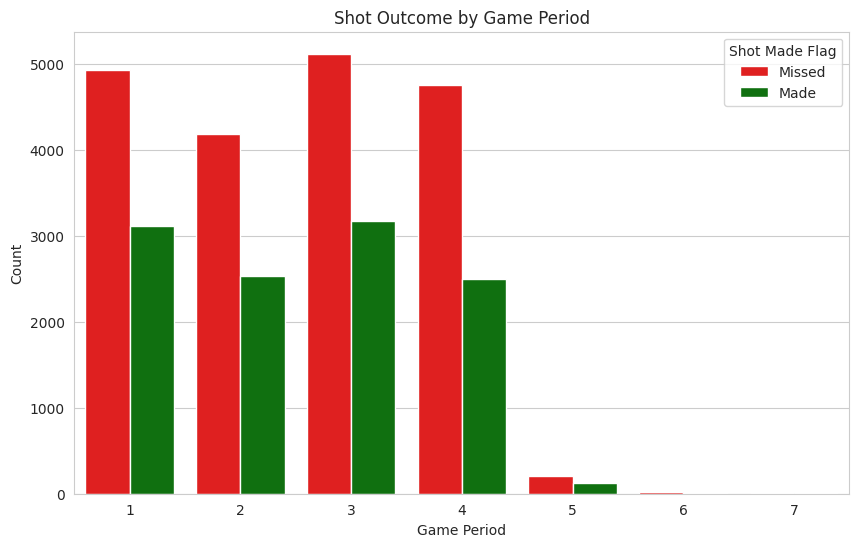

In [8]:
# Plot shot outcome by period
plt.figure(figsize=(10, 6))
sns.countplot(x='period', hue='shot_made_flag', data=data, palette={0:'red', 1:'green'})
plt.title('Shot Outcome by Game Period')
plt.xlabel('Game Period')
plt.ylabel('Count')
plt.legend(title='Shot Made Flag', labels=['Missed', 'Made'])
plt.show()


The bar chart displays the shot outcomes by game period. Observations include:

The first four periods (likely the standard quarters of a basketball game) have the most shot attempts.

The shot success rate seems relatively consistent across periods, although there's a slight dip in the fourth period.

Periods beyond the fourth are probably overtime periods, which have fewer shot attempts due to their shorter duration.

With the EDA complete, we can move on to the next step: Clustering.

## **Clustering**

Alright! Clustering can help us identify patterns or groups in the data. Given the nature of our dataset, one interesting approach would be to cluster shots based on their spatial locations (loc_x and loc_y). This can help us identify regions on the court from which shots are frequently taken.

For clustering, we can use the KMeans algorithm, a popular clustering method. Before we decide on the number of clusters, let's use the Elbow Method to determine an optimal value for
k (number of clusters). The Elbow Method involves fitting the KMeans algorithm to the data for a range of values of  k and then plotting the Within-Cluster-Sum-of-Squares (WCSS) against the number of clusters. The "elbow" of the curve represents an optimal value for
k (a balance between precision and computational cost).

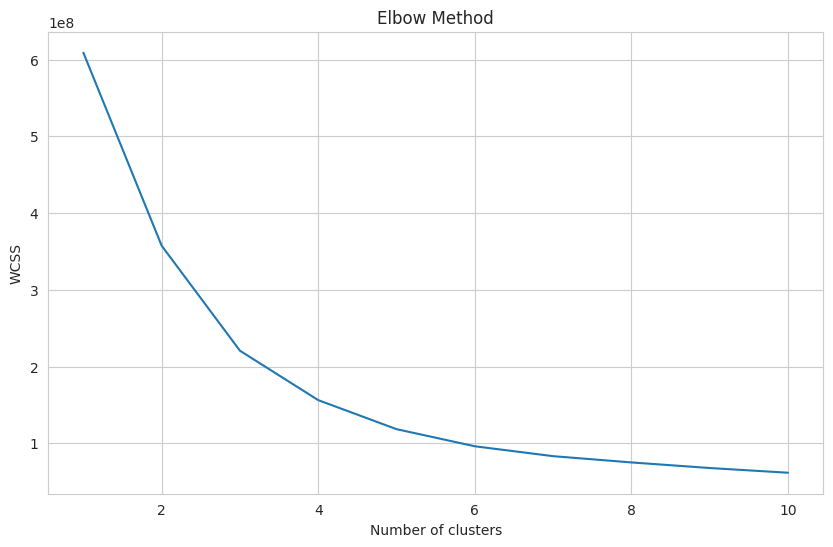

In [9]:
from sklearn.cluster import KMeans

# Data for clustering (spatial locations)
X = data[['loc_x', 'loc_y']]

# Using the Elbow method to find a good number of clusters using WCSS (within-cluster sums of squares)
wcss = []

# Check for up to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results on a graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


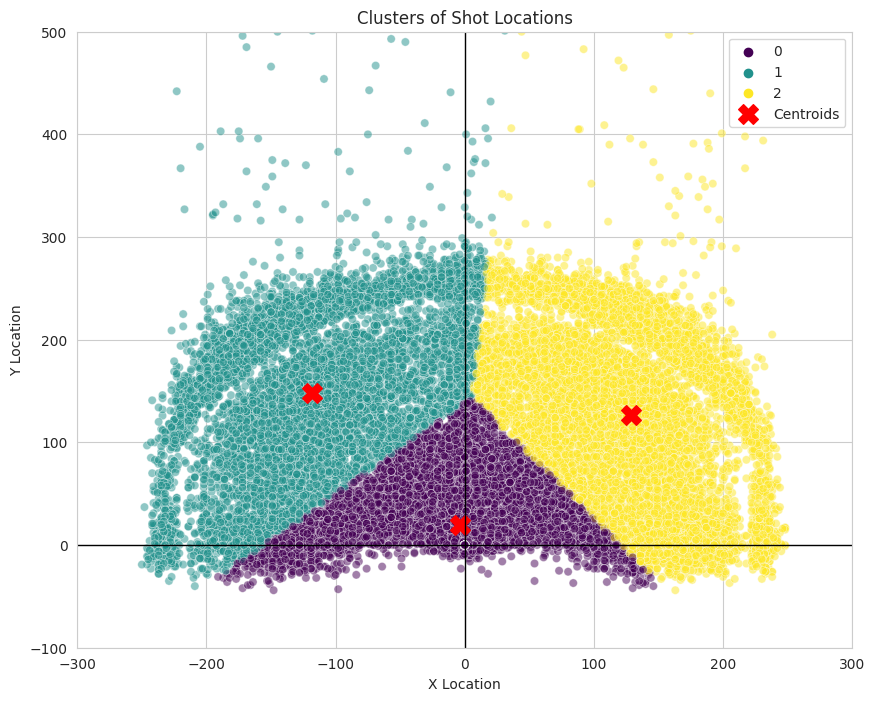

In [10]:
# Fit KMeans with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='loc_x', y='loc_y', hue='cluster', data=data, palette='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Clusters of Shot Locations')
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.xlim(-300, 300)
plt.ylim(-100, 500)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.show()


## **Anomaly Detection**

For anomaly detection, we'll use the Isolation Forest method. It's particularly useful for detecting anomalies in high-dimensional datasets like ours.

The Isolation Forest algorithm works by isolating anomalies in the dataset. It does this by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This random partitioning produces shorter paths for anomalies (since the anomalous observations are fewer and different from the normal observations).

We'll apply the Isolation Forest algorithm to detect anomalies based on the shot locations (loc_x and loc_y). After identifying the anomalies, we'll visualize them on the court.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


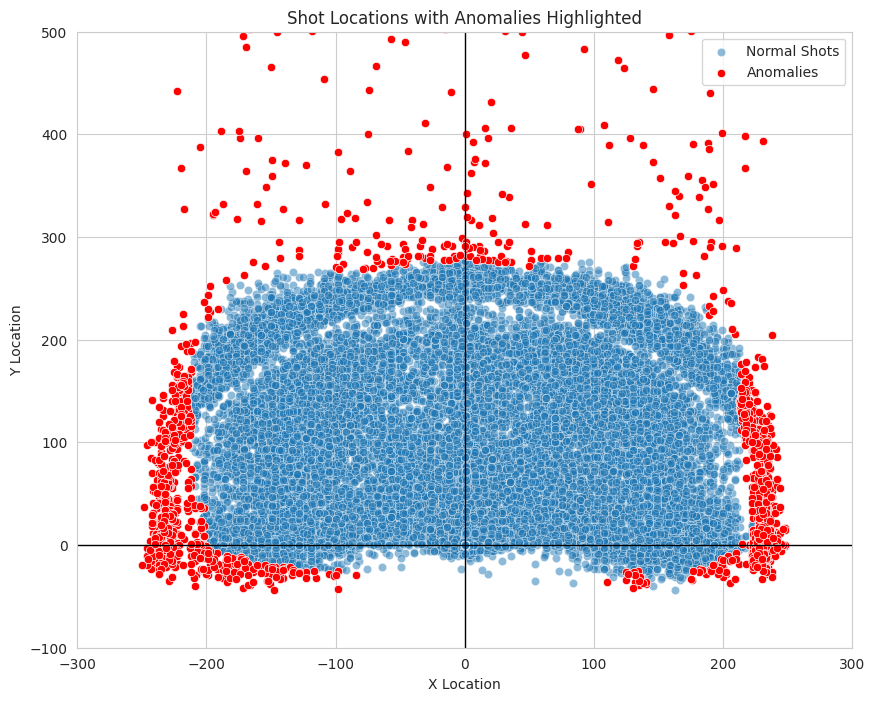

In [11]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, random_state=0)
data['anomaly'] = iso_forest.fit_predict(X)

# Filter anomalous data points
anomalies = data[data['anomaly'] == -1]

# Plot the shot locations and highlight anomalies
plt.figure(figsize=(10, 8))
sns.scatterplot(x='loc_x', y='loc_y', data=data, alpha=0.5, label='Normal Shots')
sns.scatterplot(x='loc_x', y='loc_y', data=anomalies, color='red', label='Anomalies')
plt.title('Shot Locations with Anomalies Highlighted')
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.xlim(-300, 300)
plt.ylim(-100, 500)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.show()


## Anomaly Elemination

In [12]:
cleaned_data = data[data['anomaly'] != -1]


After eliminating the anomalies, you'll have a "cleaned" dataset that no longer contains the anomalous observations. This cleaned dataset can then be used for further analysis or modeling.

**Encoding Categorical Variables**


In [13]:
# Identify categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Display categorical columns
categorical_columns


['action_type',
 'combined_shot_type',
 'season',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_name',
 'matchup',
 'opponent']

In [14]:
import pandas as pd

# One-Hot Encoding for categorical variables without any order
one_hot_columns = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name', 'matchup', 'opponent']
data_encoded = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)


## Feature Selection

In [15]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['loc_x', 'loc_y', 'lat', 'lon', 'minutes_remaining']

# Standardization (Z-score normalization)
scaler = StandardScaler()
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])


Feature Selection (Using Feature Importance from a Tree-based model as an example):

In [18]:
# Drop the game_date column
data_encoded = data_encoded.drop('game_date', axis=1)

# Check for any remaining non-numeric columns
non_numeric_columns = data_encoded.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

# If there are no other non-numeric columns, proceed with the RandomForestClassifier
if len(non_numeric_columns) == 0:
    X = data_encoded.drop('shot_made_flag', axis=1)
    y = data_encoded['shot_made_flag']

    # Train a RandomForestClassifier to get feature importance
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)

    # Get feature importances
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).sort_values(by='importance', ascending=False)

    # Display top features based on importance
    print(feature_importances.head(20))


Non-numeric columns: Index(['season', 'cluster', 'action_type_Alley Oop Layup shot',
       'action_type_Cutting Finger Roll Layup Shot',
       'action_type_Cutting Layup Shot', 'action_type_Driving Bank shot',
       'action_type_Driving Dunk Shot',
       'action_type_Driving Finger Roll Layup Shot',
       'action_type_Driving Finger Roll Shot',
       'action_type_Driving Floating Bank Jump Shot',
       ...
       'opponent_PHI', 'opponent_PHX', 'opponent_POR', 'opponent_SAC',
       'opponent_SAS', 'opponent_SEA', 'opponent_TOR', 'opponent_UTA',
       'opponent_VAN', 'opponent_WAS'],
      dtype='object', length=184)


In [19]:
# One-hot encode the 'season' column
data_encoded = pd.get_dummies(data_encoded, columns=['season'], drop_first=True)

# Convert 'cluster' and one-hot encoded columns to numeric
data_encoded['cluster'] = data_encoded['cluster'].astype(int)
one_hot_encoded_columns = [col for col in data_encoded.columns if 'action_type_' in col or 'opponent_' in col]
for col in one_hot_encoded_columns:
    data_encoded[col] = data_encoded[col].astype(int)

# Check for any remaining non-numeric columns
non_numeric_columns = data_encoded.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

# If there are no other non-numeric columns, proceed with the RandomForestClassifier
if len(non_numeric_columns) == 0:
    X = data_encoded.drop('shot_made_flag', axis=1)
    y = data_encoded['shot_made_flag']

    # Train a RandomForestClassifier to get feature importance
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)

    # Get feature importances
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).sort_values(by='importance', ascending=False)

    # Display top features based on importance
    print(feature_importances.head(20))


Non-numeric columns: Index(['combined_shot_type_Dunk', 'combined_shot_type_Hook Shot',
       'combined_shot_type_Jump Shot', 'combined_shot_type_Layup',
       'combined_shot_type_Tip Shot', 'shot_type_3PT Field Goal',
       'shot_zone_area_Center(C)', 'shot_zone_area_Left Side Center(LC)',
       'shot_zone_area_Left Side(L)', 'shot_zone_area_Right Side Center(RC)',
       ...
       'season_2006-07', 'season_2007-08', 'season_2008-09', 'season_2009-10',
       'season_2010-11', 'season_2011-12', 'season_2012-13', 'season_2013-14',
       'season_2014-15', 'season_2015-16'],
      dtype='object', length=113)


In [21]:
# Convert all the listed columns to integer type
for col in non_numeric_columns:
    data_encoded[col] = data_encoded[col].astype(int)

# Check for missing values in the dataset
missing_values = data_encoded.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# If there are missing values, fill them with the mode of the respective columns
for col in missing_columns.index:
    mode_val = data_encoded[col].mode()[0]
    data_encoded[col].fillna(mode_val, inplace=True)

# Check for any remaining non-numeric columns
non_numeric_columns = data_encoded.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

# If there are no other non-numeric columns, proceed with the RandomForestClassifier
if len(non_numeric_columns) == 0:
    X = data_encoded.drop('shot_made_flag', axis=1)
    y = data_encoded['shot_made_flag']

    # Train a RandomForestClassifier to get feature importance
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)

    # Get feature importances
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).sort_values(by='importance', ascending=False)

    # Display top features based on importance
    print(feature_importances.head(20))


Non-numeric columns: Index([], dtype='object')
                            feature  importance
0                     game_event_id    0.069516
12                          shot_id    0.068533
9                 seconds_remaining    0.064220
1                           game_id    0.058412
4                             loc_y    0.048112
2                               lat    0.048034
3                             loc_x    0.047759
5                               lon    0.047361
6                 minutes_remaining    0.046771
10                    shot_distance    0.034466
40            action_type_Jump Shot    0.026196
7                            period    0.024740
41           action_type_Layup Shot    0.008595
71          combined_shot_type_Dunk    0.008331
13                          cluster    0.006883
55    action_type_Running Jump Shot    0.006285
26   action_type_Driving Layup Shot    0.006106
208                  season_2008-09    0.005296
205                  season_2005-06    0.

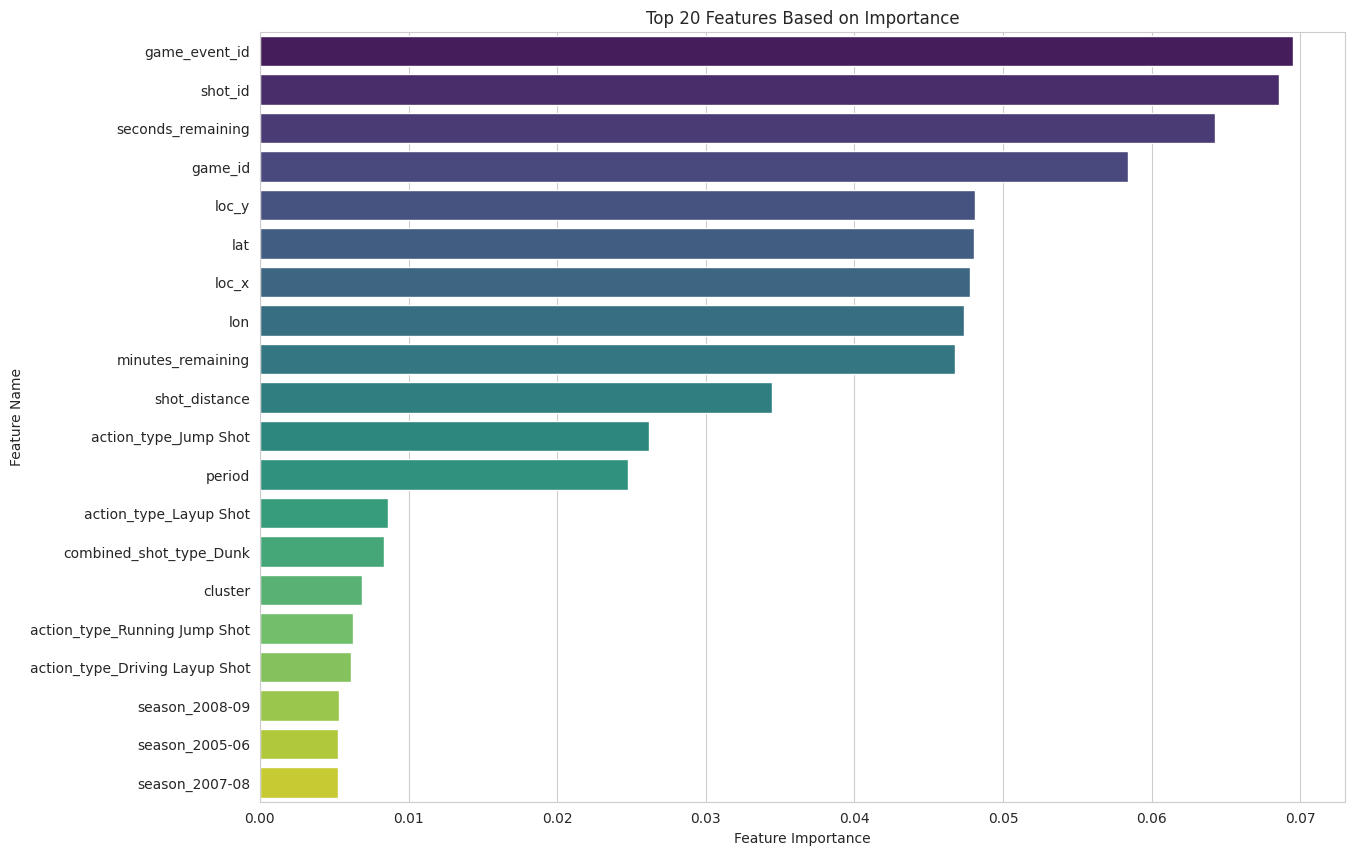

In [23]:
# Plot top 20 features based on importance
top_features = feature_importances.head(20)
plt.figure(figsize=(14, 10))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title('Top 20 Features Based on Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()


# Model Building

Steps to Build the Model:

Split the Data: Divide the dataset into training and testing sets to evaluate the model's performance.

Train the Model: Use the training data to train the Random Forest Classifier.

Evaluate the Model: Predict the shot outcomes on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, etc.).

Fine-Tuning (if necessary): Depending on the model's performance, we might consider hyperparameter tuning to improve it.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 67.74%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.86      0.77      3810
         1.0       0.62      0.38      0.47      2330

    accuracy                           0.68      6140
   macro avg       0.66      0.62      0.62      6140
weighted avg       0.67      0.68      0.65      6140

